In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import random

In [2]:
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

In [113]:
#hm represents how many data points we want
#step represents how far per average to step up the value of y point
#below function is used to create a dataset
def create_dataset(hm,variance,step = 2,correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64) , np.array(ys,dtype = np.float64)

In [114]:
xs,ys = create_dataset(40,40,2,correlation = 'neg')

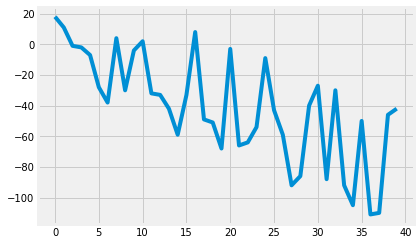

In [115]:
plt.plot(xs,ys)

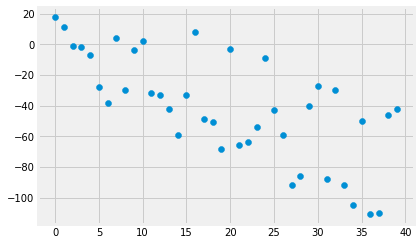

In [116]:
plt.scatter(xs,ys)

In [117]:
def best_fit_slope(xs,ys):
    m = (mean(xs)*mean(ys) - mean(xs*ys))/(mean(xs)*mean(xs) - mean(xs*xs))
    return m
m = best_fit_slope(xs,ys)

In [118]:
print(m)

-2.10797373358349


In [119]:
def y_intercept(xs,ys,m):
    b = mean(ys) - m*mean(xs)
    return b
b = y_intercept(xs,ys,m)

In [120]:
print(b)

-0.16951219512194626


In [121]:
best_fit_line = [(m*x) + b for x in xs]

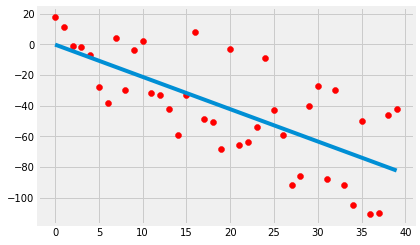

In [122]:
plt.scatter(xs,ys, color = 'r')
plt.plot(xs,best_fit_line)

In [123]:
#R Sqaured is the parameter that is the error that we use to check the accuracy of our best fit line
def squared_error(ys_original,ys_line):
    return sum((ys_line - ys_original)**2)
def r_squared_error(ys_original,ys_line):
    ys_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regr = squared_error(ys_original,ys_line)
    squared_error_y_mean = squared_error(ys_original,ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [124]:
r_squared =  r_squared_error(ys,best_fit_line)
print(r_squared)

0.49792186292149576
